1.

Bootstrapping is a resampling method used to estimate the mean, variance, confidence intervals etc., of a population from a sample. From this original sample, repeatedly take new random samples (which is bootstrap samples). bootstrapping sampling is with replacement, means that the seleeted boost sample data need to be put back into the original data, so that it can be selected again. This process is repeated often thousands of times, to create a distribution of the statistic. Bootstrap distribution can help to estimate the desired property of the population, such as the confidence interval or standard error of the statistic.

Standard Deviation measures the dispersion of data points relative to the mean in the original data(a population or a sample). It reflects the amount of variation or dispersion in a dataset. It reflects how much the data points deviate from the average within the dataset. high standard deviation indicates that the values are widely spread from the mean, while a low standard deviation suggests that they are clustered closely around it.

Standard Error of the Mean measures the variability of sample means as an estimate of the population mean.By bootstrapping method, each sample produces a different sample mean. It reflects how these sample means are expected to vary from the true population mean.

Diference： Standard deviation measures the dispersion of data points relative to the mean and can apply to an entire population or a sample. The standard error of the mean specifically relates to bootstrapped samples and reflects the reliability of the sample mean as an estimate of the population mean.

CHAT SUMMARY Q1:

Link: https://chatgpt.com/share/66fee510-df48-8004-a221-af308d2c8583

Summary:

In our conversation, we explored the concepts of **standard deviation (SD)** and **standard error of the mean (SEM)** in statistics, as well as the method of **bootstrapping**.

1. **Standard Deviation (SD)** measures the variability or dispersion of data points within a population or sample. It indicates how spread out the individual values are from the mean. A high SD suggests a wide spread of values, while a low SD indicates that values are clustered closely around the mean.

2. **Standard Error of the Mean (SEM)** assesses the variability of sample means obtained from bootstrapping. It reflects how much the mean of a sample is expected to differ from the true population mean. SEM decreases as the sample size increases, indicating more reliable estimates of the population mean.

3. **Bootstrapping** is a resampling technique used to generate multiple simulated datasets from an original dataset by sampling with replacement. This method allows for estimating statistics like the SEM, providing insights into the reliability of the sample mean as an estimate of the population mean.

We emphasized that **SD** is calculated for the entire dataset, while **SEM** specifically pertains to bootstrapped samples. This distinction helps clarify the different roles these metrics play in statistical analysis.


2.

Form a 100 bootstrap samples from the original dataset, where each sample is generated by randomly selecting data points with replacement. Once these bootstrap samples are obtained, the sample mean for each one is calculated, resulting in a set of 100 sample means.

The mean of these bootstrap sample means is computed to provide a central estimate of the population mean. Following this, the standard error of the bootstrap sample means is calculated by determining the standard deviation of the sample means and dividing it by the square root of the number of bootstrap samples. This standard error quantifies the variability among the sample means.

The 95% confidence interval can be constructed using the formula mean±2×SE. This interval estimates where the true population mean is likely to lie, capturing approximately 95% of the bootstrapped sample means. By following this methodology, a robust confidence interval is created that reflects the uncertainty inherent in the sample data.

CHAT HISTORY Q2:

LINK: https://chatgpt.com/share/66ff0ada-68a4-8004-b03d-4de592c0b584
SUMMARY:
In our conversation, we discussed how to create a 95% confidence interval using the standard error of the mean (SEM) and bootstrapping methods. 

First, I explained the steps to calculate the confidence interval using SEM, which involves calculating the sample mean, sample standard deviation, and then SEM. The confidence interval is formed by using the sample mean and a critical value, typically 1.96 for a 95% confidence level, applied to the SEM. 

Next, I detailed the bootstrapping process, where you generate multiple samples from the original data, compute the means of these samples, and then determine the 2.5th and 97.5th percentiles to create the confidence interval. This approach helps ensure that the interval captures 95% of the bootstrapped sample means.

Overall, the conversation highlighted the theoretical and practical aspects of constructing a confidence interval, providing a clear understanding of both methods.

3.
1.load real world data using pd.read_csv().
2.set the repeats time(1000) and sample size(be equal to original data n) 
3.use np.zero to create some blank vectors 
4.use np.random.seed to set an initial random seed to ensure that the same results can be reproduced when running the code multiple times.
5.use loop( for i in range) and np.random.choice, generate bootstrap samples from the original dataset. Make sure the sample is with replace.
6.use sample.mean() to calculate thethe sample mean of each boostrap sample.
7.use the np.quantile() function to get the values corresponding to the 2.5th and 97.5th percentiles of the sorted bootstrapped means. calling np.quantile(bootstrapped_means, [0.025, 0.975]).

Using this method is beneficial because it relies on the distribution of bootstrapped means to create the confidence interval, which provides a better understanding of the estimate's variability without having to depend on standard error calculations. 

A larger sample size typically leads to less variability in the sample mean, resulting in narrower confidence intervals. This occurs because a larger sample provides a more accurate representation of the population, reducing uncertainty in the estimates. Also, keep the bootstrapped sample size equal to that of the original sample when creating bootstrap samples. This ensures that the bootstrap samples capture the original dataset's characteristics and variability accurately. If the bootstrapped samples were different in size, they wouldn't adequately reflect the population, leading to biased estimates.

If bootstrapped samples are created with the same size as the original sample but was without replacement, they wouldn’t really be considered true bootstrap samples, and can't accurately estimate the result. In bootstrap sampling, samples are drawn with replacement, meaning some data points can be selected multiple times while others might not be included at all. This method helps simulate the original dataset's variability and allows for robust estimates of the mean and its confidence intervals.

In [12]:
#4.
import pandas as pd

url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
data = pd.read_csv(url)

reps = 1000
sample_size= len(data)

bootstrap_means = np.zeros(reps)

np.random.seed= 150

for i in range(reps):
   
    bootstrap_sample = np.random.choice(data['body_mass_g'].dropna(), size=sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
   
lower_bound = np.percentile(bootstrap_means, 2.5) 
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Bootstrap Confidence Interval for the Population Mean: ({lower_bound:.2f}, {upper_bound:.2f})")



95% Bootstrap Confidence Interval for the Population Mean: (4118.10, 4281.29)


Q4.

Explanations in My Own Words:

1. Importing Libraries


2. Setting Bootstrap Sample Size: n_bootstrap = 1000
Generating 1,000 samples to ensure a more accurate and reliable estimate.

3. Setting a sample size to be len(data), which is equal to the original sample n.

4. Creating Array for Means: 
bootstrap_means = np.zeros(n_bootstrap)
An array named bootstrap_means is initialized to store the means calculated from each bootstrap sample.


5. Executing the Bootstrap Procedure:
for i in range(n_bootstrap)
A loop runs for the specified number of bootstrap samples.
A bootstrap sample is generated by randomly selecting values from the original data, allowing for replacement.bootstrap_sample = np.random.choice(data['body_mass_g'].dropna(), size=len(data), replace=True)
The mean of this bootstrap sample is calculated and stored in the bootstrap_means array.
bootstrap_means[i] = np.mean(bootstrap_sample)


6. Calculating Confidence Intervals:
The lower and upper bounds of the 95% confidence interval are determined by finding the 2.5th and 97.5th percentiles of the bootstrap_means array. This gives the range in the expected the true population mean to fall with 95% confidence.

7. Displaying the Result: printed the result in a formatted manner.

8. Modifying for the Median:
To get the code for calculating the bootstrap confidence interval for the population median instead of the mean, the line calculating the mean of the bootstrap sample should be replaced with one that calculates the median.
A separate array, bootstrap_medians, would be required to store the median values from each bootstrap sample, and the confidence interval would be calculated using these medians in a similar process as above.

CHAT HISTORY Q4:

LINK: https://chatgpt.com/share/66ff0a88-202c-8004-9348-c049c2518dea
SUMMARY:
In our conversation, we discussed bootstrapping techniques using the Penguin dataset. You initially provided a code snippet for calculating the bootstrap confidence interval for the population mean, but it encountered several errors. 

We identified the following issues:

1. **Random Seed Assignment**: The correct syntax for setting the random seed was noted.
2. **Column Selection**: It was emphasized that a specific numerical column should be selected for sampling, rather than attempting to sample the entire DataFrame.
3. **Mean Calculation**: The mean should be calculated for the selected column rather than on the bootstrap sample directly.

You suggested that the sample size should be equal to the number of rows in the original dataset, and I provided an updated code snippet that sets the sample size accordingly. The final code included adjustments for dropping missing values in the `body_mass_g` column, ensuring a robust bootstrap confidence interval calculation. 


5.

A population parameter is a constant value that describes a characteristic of an entire population, such as the mean or proportion. A sample statistic is used when measuring the entire population is often impractical due to constraints。Sample statistics is derived from a subset of the population, to estimate the population parameter.

The sample statistic is used to make guesses about the population parameter when creating a confidence interval. The confidence interval shows a range of values around the sample statistic, which indicates how uncertain the estimate is due to limited data. This difference is important because it shows that although the sample statistic gives useful information about the population parameter, they are not the same. There will always be some uncertainty in the estimate, and the confidence interval helps measure that uncertainty. Understanding this connection is key to making better decisions based on sample data.

CHAT HISTORY Q5:
    
LINK:https://chatgpt.com/share/66ff1436-17bc-8004-aa03-068f283f4136
SUMMARY:
In our conversation, we discussed the importance of distinguishing between population parameters and sample statistics when constructing confidence intervals. 

- **Population Parameters** represent fixed characteristics of the entire population (e.g., population mean), which are usually unknown and impractical to measure directly. 
- **Sample Statistics** are derived from a subset of the population (e.g., sample mean) and serve as estimates of the population parameters.

We highlighted that confidence intervals are built around sample statistics to estimate the population parameters while quantifying uncertainty. This distinction is essential for understanding statistical inference and the variability in estimates, emphasizing that sample statistics are not exact measures of the population parameters. Overall, this understanding is critical for making informed decisions based on sample data.

6.

1.What is the process of bootstrapping? 
Bootstrapping is a statistical technique used to estimate population characteristics from a sample. The process begins with the original sample, from which data points are repeatedly selected at random with replacement. This means that after picking a data point, it is placed back before the next selection. This process is repeated thousands of times, creating a distribution of the statistic. By generating many of these new samples, known as bootstrap samples, one can analyze how estimates may vary based on different random selections.

2.What is the main purpose of bootstrapping? 
Since it’s often impossible to analyze or estimate data for an entire population. For example, we are trying to determine the average age of everyone in the world but we have missing values, then we are not able to calculate using original sample(population). So, the primary purpose of bootstrapping is to evaluate the reliability of estimates obtained from a sample. It helps to understand the uncertainty surrounding those estimates without requiring additional data collection. By generating numerous bootstrap samples, one can observe how much the estimates fluctuate, providing insights into the stability and range of the original findings.

3.If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
If there is a hypothesis about the average of a population x, bootstrapping can be used with a sample of size 
n to determine if that guess is reasonable. This involves creating multiple bootstrap samples from the original sample by resampling with replacement and calculating the average for each sample. After producing a sufficient number of these averages, one can evaluate how many are close to the initial guess x. If most of the bootstrap averages cluster around x, it indicates that the original guess is likely valid. Conversely, if they are mostly distant from x, it suggests that the hypothesis may need adjustment. Bootstrapping offers a method to assess the validity of a hypothesis based on the data that we already have.

7.

Null Hypothesis (H0): 
μ=0
This hypothesis asserts that the drug has no effect on the population mean, meaning that the average effect of the drug is zero.

Alternative Hypothesis (HA): 
μ≠0
This hypothesis states that the drug does have an effect on the population mean, indicating that the average effect is not zero.

When we calculate a 95% confidence interval, it means there is a 95% chance that the true population mean μ lies within that interval. If the interval includes 0, it means that in 95% of cases, μ could be equal to 0. This suggests that with a high probability, the null hypothesis H0(which states that there is no effect) might be true. Therefore, we cannot reject h0, and this result is referred to as "failing to reject h0."

In other words, if the confidence interval includes 0, it indicates that we don’t have enough evidence to claim the drug has a significant effect, so we retain H0. Because we "failed to reject H0", we cannot conclude that HA is correct (that μ ≠ 0), which means we don’t have enough evidence to say that HA is true. In other words, we cannot claim that the drug has an effect.


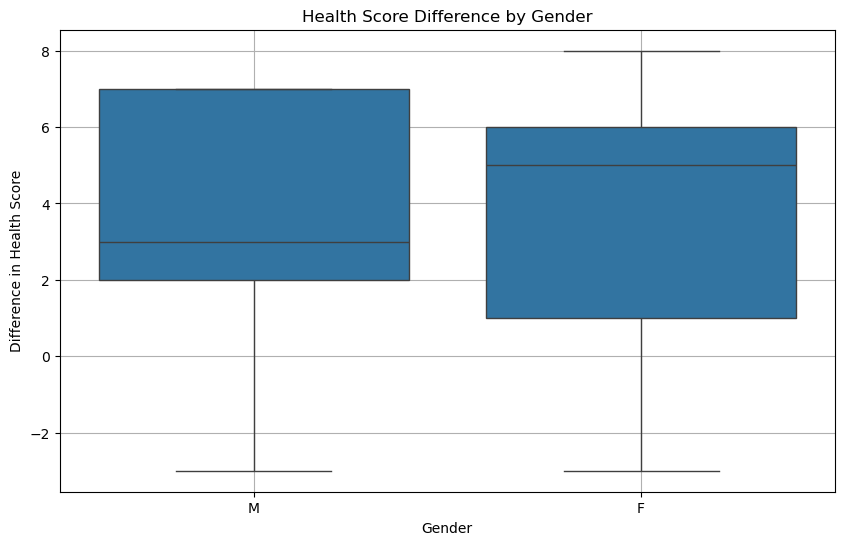

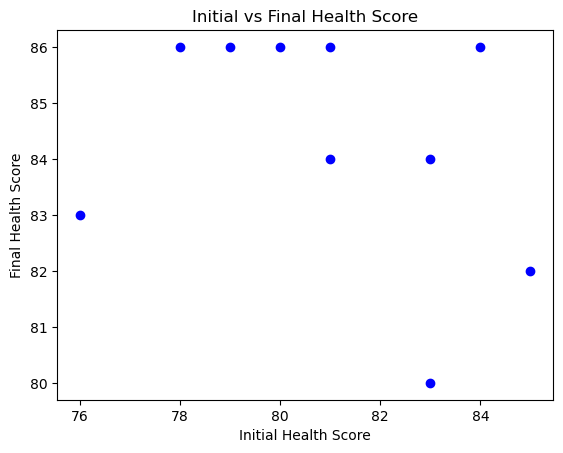

Mean of Differences: 3.30
Standard Deviation of Differences: 4.03
T-statistic: 2.59, P-value: 0.0292
95% Confidence Interval for the Mean Difference: [0.8 5.6]
Reject the null hypothesis: There is significant evidence to suggest the vaccine has an effect.


In [13]:
#8.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(329)

data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

df['Difference'] = df['FinalHealthScore'] - df['InitialHealthScore']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Difference', data=df)
plt.title('Health Score Difference by Gender')
plt.ylabel('Difference in Health Score')
plt.xlabel('Gender')
plt.grid()
plt.show()

plt.scatter(data['InitialHealthScore'], data['FinalHealthScore'], color='blue')
plt.title('Initial vs Final Health Score')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.show()

mean_difference = df['Difference'].mean()
std_difference = df['Difference'].std(ddof=1)
n = df['Difference'].count()

t_statistic, p_value = stats.ttest_rel(df['FinalHealthScore'], df['InitialHealthScore'])
print(f"Mean of Differences: {mean_difference:.2f}")
print(f"Standard Deviation of Differences: {std_difference:.2f}")
print(f"T-statistic: {t_statistic:.2f}, P-value: {p_value:.4f}")

boot_means = np.empty(bootstraps)

for i in range(bootstraps):
    boot_sample = np.random.choice(df['Difference'], size=n, replace=True)
    boot_means[i] = boot_sample.mean()

conf_int = np.percentile(boot_means, [2.5, 97.5])
print(f"95% Confidence Interval for the Mean Difference: {conf_int}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is significant evidence to suggest the vaccine has an effect.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence to suggest the vaccine has an effect.")

df.to_csv('vaccine_data_analysis.csv', index=False)


9.
YES